In [24]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/01_dendrone_pore/py_files')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib.cm import get_cmap

from dendrons_pore import dendrons_pore
from create_in import create_in
from out_reader import out_reader

Параметры

In [25]:
Cs = 0.001
chi = 0.5
alpha = 0.5
S = 150

D = 120
N = 200
q = 2

g_range = [0, 1, 2, 3]

Аналитическая теория

In [26]:
phi_dif_gen, generation = {}, {}

for g in  g_range:
        N, n, theta, H_dendrons, r_in_dendrons, r_out_dendrons,\
                psi_in_dendrons, psi_out_dendrons, c_pol_dendrons, rho_dendrons = dendrons_pore(
                        Cs = Cs,
                        #параметры щетки
                        alpha = alpha,
                        S = S,
                        
                        #параметры поры
                        D = D,
                        
                        #параметры дендрона
                        g = g,
                        q = q,
                        n_base = 40,
                        N_opt = N)
        
        phi_dif_gen[g] = (r_in_dendrons, c_pol_dendrons)
        generation[g] = (n)

SCF расчеты

In [27]:
phi_SCF, ends_SCF, ends_leg_SCF = {}, {}, {}

for g, n in generation.items():
    # Определяем структуру в зависимости от поколения
    if g == 0:
        pol_structure = f'(P0)1(P){n-2}(E)1'
        print(f"Линейная цепочка {pol_structure=}")
    elif g == 1:
        pol_structure = f'(P0)1(P){n-2}(EL)1[(P){n-1}(E)1](P){n-1}(E)1'
        print(f"Первое поколение разветвленность 2 {pol_structure=}")
    elif g == 2:
        pol_structure = f'(P0)1(P){n-2}(EL)1[(P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1](P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1'
        print(f"Второе поколение разветвленность 2 {pol_structure=}")
    elif g == 3:
        pol_structure = f'(P0)1(P){n-2}(EL)1[(P){n-1}(E)1[(P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1](P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1](P){n-1}(E)1[(P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1](P){n-1}(E)1[(P){n-1}(E)1](P){n-1}(E)1'
        print(f"Третье поколение разветвленность 2 {pol_structure=}")
    else:
        print(f"Поколение {g} не обработано")
        continue

    # Генерируем имя файла и создаем SCF-инпут
    file_name_pro = create_in(
        template_pore='/home/tpopova/prj/PB_SCF/01_dendrone_pore/scf_templates/dendr_template.in',
        range_param='generation',
        min_val=0.1,
        max_val=0.1,
        Cs=Cs,
        chi=chi,
        D=D,
        N=N,
        S=S,
        alpha=alpha,
        pol_structure=pol_structure  # Передаем структуру
    )
    
    # Парсим профили
    psi, phi_brush, phi_end_brush, phi_end_leg_brush = out_reader(file_names=file_name_pro)
    
    # Сохраняем результаты
    coord = np.arange(D)
    phi_SCF[g] = (coord, phi_brush)
    ends_SCF[g] = (coord, phi_end_brush)
    ends_leg_SCF[g] = (coord, phi_end_leg_brush)

Линейная цепочка pol_structure='(P0)1(P)198(E)1'
Problem nr 1 out of 1
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 1.988873e+00 |g| = 4.782687e+00 alpha = 1.000000e+00 
hessian scaling: 0.955904
it =  1  E = 1.821985e+00 |g| = 4.415096e+00 alpha = 1.209087e-01 
it =  2  E = 2.948901e+00 |g| = 4.771436e+00 alpha = 4.710007e-02 
it =  3  E = 4.570579e+00 |g| = 4.674504e+00 alpha = 1.793352e-02 
it =  4  E = 7.051558e+00 |g| = 4.977678e+00 alpha = 8.538776e-03 
it =  5  E = 5.722528e+00 |g| = 5.128888e+00 alpha = 1.243423e-02 
it =  6  E = 1.824535e+01 |g| = 5.101780e+00 alpha = 1.134038e-03 
it =  7  E = 1.470818e+01 |g| = 5.059184e+00 alpha = 1.617243e-03 
it =  8  E = 1.042790e+01 |g| = 5.070021e+00 alpha = 3.020410e-03 
it =  9  E = 8.339073e+00 |g| = 5.017423e+00 alpha = 4.397507e

/tmp/ipykernel_2231794/318480546.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")


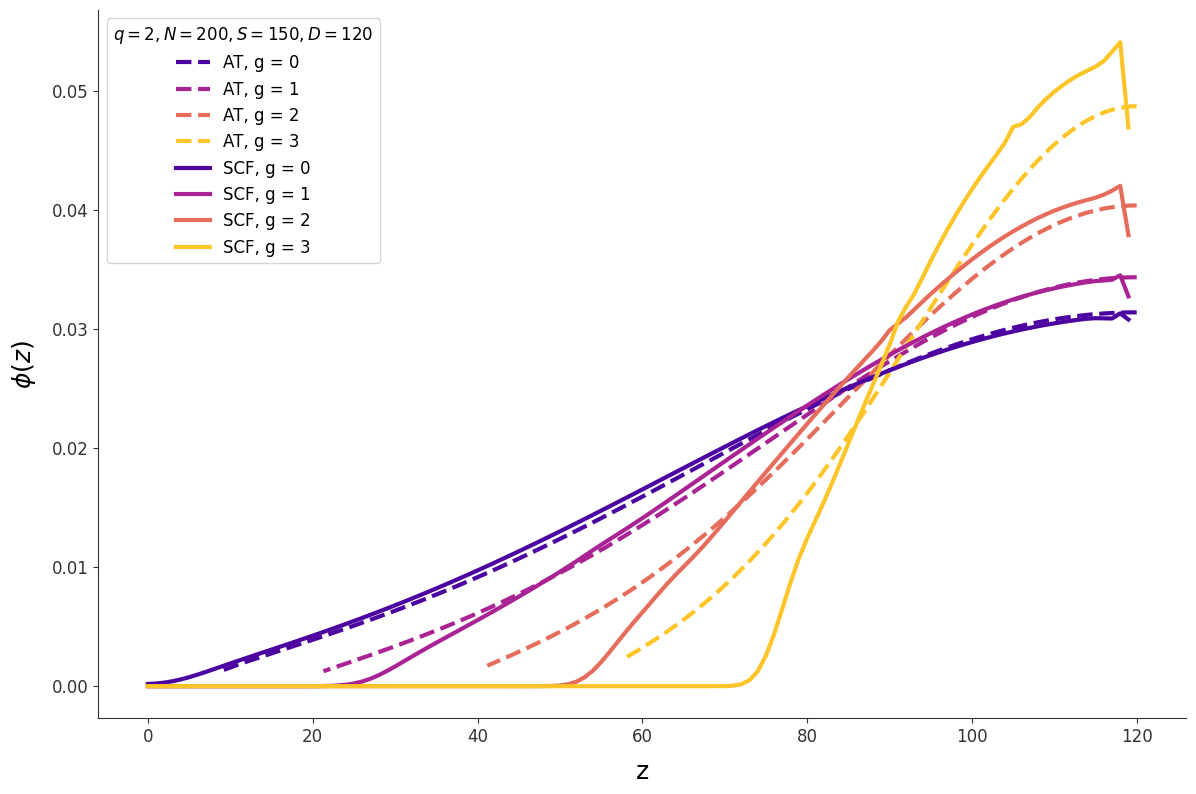

In [28]:
# Построение графиков
plt.figure(figsize=(12, 8))
color_map = get_cmap("plasma")

for i, (g, (r_in_dendrons, c_pol_dendrons)) in enumerate(phi_dif_gen.items()):
    base_color = color_map((i + 0.5) / len(g_range))  # базовый цвет
    solid_color = base_color  # цвет для сплошной линии
    
    plt.plot(r_in_dendrons, c_pol_dendrons, label=f"AT, g = {g}", linewidth=3, color=solid_color, linestyle="--")

for i, (g, (coord, phi_brush)) in enumerate(phi_SCF.items()):
    base_color = color_map((i + 0.5) / len(g_range))  # базовый цвет
    solid_color = base_color  # цвет для сплошной линии
    
    plt.plot(coord, phi_brush, label=f"SCF, g = {g}", linewidth=3, color=solid_color, linestyle="-")


# Настройка визуализации
plt.xlabel("z", fontsize=18, labelpad=10)
plt.ylabel("$\\phi(z)$", fontsize=18, labelpad=10)
plt.legend(fontsize=12, title=f"$q = {q}, N = {N}, S = {S}, D = {D}$", title_fontsize=12, loc="upper left")
plt.tight_layout()
# plt.ylim(0, 0.03)
# plt.xlim(545, D)

# Добавляем фон и рамку
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_color("#333333")
plt.gca().spines["bottom"].set_color("#333333")
plt.gca().tick_params(axis='both', which='major', labelsize=12, colors="#333333")

# Показ графика
# plt.savefig('Fig2.pdf', dpi=300, bbox_inches='tight')
plt.show()